# Spotify Data Visualisation Project

Streaming Data from 16th Sep 2023 - 19th Feb 2024

# Questions

1. What day of the week are songs streamed the most?
2. Users top 10 streamed songs?
3. Users top 20 streamed artists?
4. What time of day does the user listen to music the most?
5. How many songs are on the user's playlists?

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

In [337]:
#Importing excel data

df = pd.read_excel("/Users/juanitanelson-addy/OneDrive/VS CODE/CODING PROJECTS/datasets/streaminghistory.xlsx")
df

,endTime,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,includesong
0,2023-09-16 21:48,2023-09-16,Sun,21:48,Drake,Pipe Down,205721,3.428683,Yes
1,2023-09-16 21:56,2023-09-16,Sun,21:56,Victoria Monét,Alright,69036,1.150600,Yes
2,2023-09-16 21:59,2023-09-16,Sun,21:59,Odeal,Repercussions,180714,3.011900,Yes
3,2023-09-16 22:01,2023-09-16,Sun,22:01,Fireboy DML,Bandana,133127,2.218783,Yes
4,2023-09-17 19:20,2023-09-17,Sun,19:20,21 Savage,Runnin,14656,0.244267,No
...,...,...,...,...,...,...,...,...,...
9995,2024-02-19 02:11,2024-02-19,Mon,02:11,Amari Noelle,Unusual,21008,0.350133,No
9996,2024-02-19 02:11,2024-02-19,Mon,02:11,Keyshia Cole,Love,2591,0.043183,No
9997,2024-02-19 02:11,2024-02-19,Mon,02:11,Lucky Daye,Good & Plenty - Remix,1056,0.017600,No
9998,2024-02-19 02:11,2024-02-19,Mon,02:11,Tory Lanez,H.E.R.//Are You Dumb,11088,0.184800,No


In [338]:
#Skipped songs - assign to variable, then drop the songs, then call new DF with skipped songs

skipped_songs = df[df["includesong"] == "No"].index
df.drop(skipped_songs,inplace=True)

df

,endTime,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,includesong
0,2023-09-16 21:48,2023-09-16,Sun,21:48,Drake,Pipe Down,205721,3.428683,Yes
1,2023-09-16 21:56,2023-09-16,Sun,21:56,Victoria Monét,Alright,69036,1.150600,Yes
2,2023-09-16 21:59,2023-09-16,Sun,21:59,Odeal,Repercussions,180714,3.011900,Yes
3,2023-09-16 22:01,2023-09-16,Sun,22:01,Fireboy DML,Bandana,133127,2.218783,Yes
7,2023-09-17 19:44,2023-09-17,Sun,19:44,Beyoncé,Party - Homecoming Live,228208,3.803467,Yes
...,...,...,...,...,...,...,...,...,...
9846,2024-02-18 23:09,2024-02-18,Sun,23:09,Aaliyah,Rock The Boat,274733,4.578883,Yes
9857,2024-02-18 23:13,2024-02-18,Sun,23:13,Ne-Yo,It Just Ain't Right,227933,3.798883,Yes
9863,2024-02-18 23:15,2024-02-18,Sun,23:15,Rihanna,Te Amo,64551,1.075850,Yes
9879,2024-02-19 01:41,2024-02-19,Mon,01:41,A Boogie Wit da Hoodie,Come Closer (feat. Queen Naija),134880,2.248000,Yes


In [339]:
#Overall count in each column
df.count()

endTime        5914
date           5914
wkday          5914
time           5914
artistName     5914
trackName      5914
msPlayed       5914
minsPlayed     5914
includesong    5914
dtype: int64

In [340]:
#Shape of dataframe
print(df.shape)

(5914, 9)


## What day of the week are songs streamed the most?

In [341]:
#Selecting columns we want
df[["date", "wkday", "minsPlayed"]]

,date,wkday,minsPlayed
0,2023-09-16,Sun,3.428683
1,2023-09-16,Sun,1.150600
2,2023-09-16,Sun,3.011900
3,2023-09-16,Sun,2.218783
7,2023-09-17,Sun,3.803467
...,...,...,...
9846,2024-02-18,Sun,4.578883
9857,2024-02-18,Sun,3.798883
9863,2024-02-18,Sun,1.075850
9879,2024-02-19,Mon,2.248000


In [342]:
#Assinging variable to weekdays to keep them in order
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [343]:
#Counting up mins played each day of the week
mins = df.groupby("wkday")["minsPlayed"].sum().reindex(day)
mins

wkday
Mon    1874.146183
Tue    3403.496617
Wed    3659.874083
Thu    3449.201567
Fri    2344.905333
Sat            NaN
Sun    5310.979983
Name: minsPlayed, dtype: float64

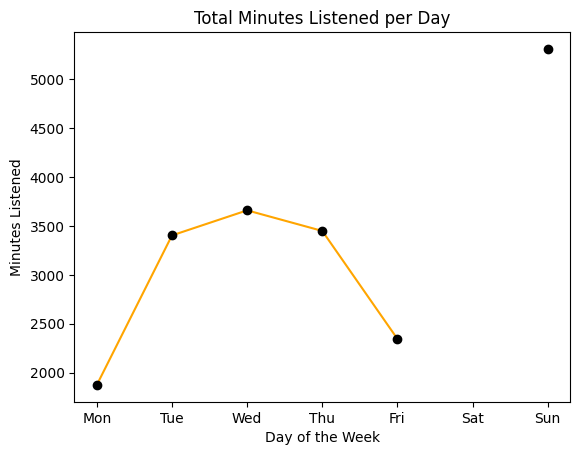

In [344]:
#Display data

min_day = df.groupby("wkday")["minsPlayed"].sum().reindex(day)

plt.plot(min_day, color="Orange", marker="o", mfc="black", mec="k")
plt.ylabel("Minutes Listened")
plt.xlabel("Day of the Week")
plt.title("Total Minutes Listened per Day")
plt.show()

Findings: User listened to the most music on Sundays, and none on Saturday. 

Recommendation: Perhaps, new music ads should be played on those days because the user is more likely to see it.
Potentially create incentives to increase user engagement on ower count days.

## Top 10 Streamed Songs

In [345]:
#No of time each track name appears
pd.value_counts(df["trackName"])

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/1136011531.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["trackName"])


trackName
Sneak                    22
Outside                  21
Burn                     18
U Got It Bad             18
Mad                      18
                         ..
ALREADY                   1
Fountains (with Tems)     1
Sere (Remix)              1
Useless                   1
808                       1
Name: count, Length: 2307, dtype: int64

In [346]:
#First 10 tracks
pd.value_counts(df["trackName"]).head(10)

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/2225152322.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["trackName"]).head(10)


trackName
Sneak                                              22
Outside                                            21
Burn                                               18
U Got It Bad                                       18
Mad                                                18
Forgive Me                                         18
Champagne Life                                     18
On My Mama                                         17
Luv Is Dro (feat. Static Major & Bryson Tiller)    17
Game Over                                          17
Name: count, dtype: int64

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/2317477626.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["trackName"]).head(10).plot(kind="bar", color="purple")


Text(0.5, 0, 'Song Name')

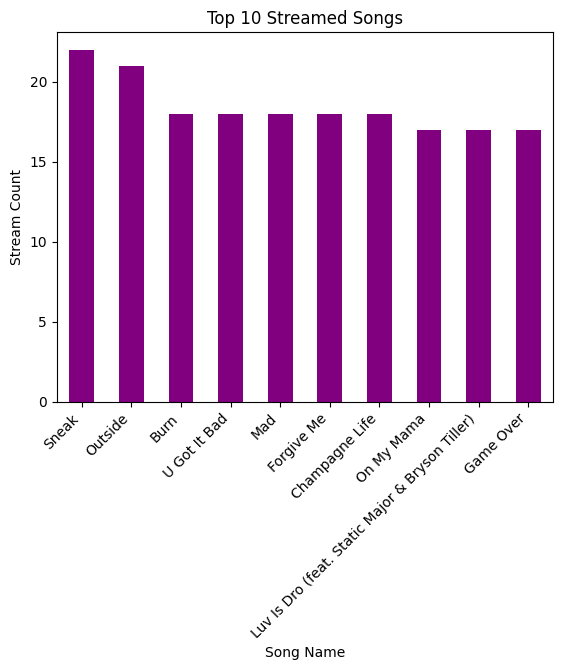

In [347]:
#Bar graph to display
pd.value_counts(df["trackName"]).head(10).plot(kind="bar", color="purple")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Streamed Songs")
plt.ylabel("Stream Count")
plt.xlabel("Song Name")

Findings: Sneak was the most replayed song in this period.

Recommendation: Spotify could queue up songs similar to it to help the user discover more songs.

## Top 20 Streamed Artists

In [348]:
pd.value_counts(df["artistName"])

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/1340954287.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["artistName"])


artistName
Ne-Yo              603
Dave               384
Beyoncé            303
Jhené Aiko         287
USHER              284
                  ... 
Lizzo                1
Bloody Civilian      1
Fleetwood Mac        1
Jim-E Stack          1
Syd                  1
Name: count, Length: 894, dtype: int64

In [349]:
pd.value_counts(df["artistName"]).head(20)

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/1779618458.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["artistName"]).head(20)


artistName
Ne-Yo             603
Dave              384
Beyoncé           303
Jhené Aiko        287
USHER             284
Bryson Tiller     156
Jack Harlow       140
Lucky Daye        135
Victoria Monét    132
Rema              129
Don Toliver       127
One Direction     126
Drake             115
Rihanna           114
Chloe x Halle     108
Stormzy           103
FLO               101
Jorja Smith        80
Mac Ayres          78
Bruno Mars         74
Name: count, dtype: int64

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/3229290339.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["artistName"]).head(20).plot(kind="barh", color="purple")


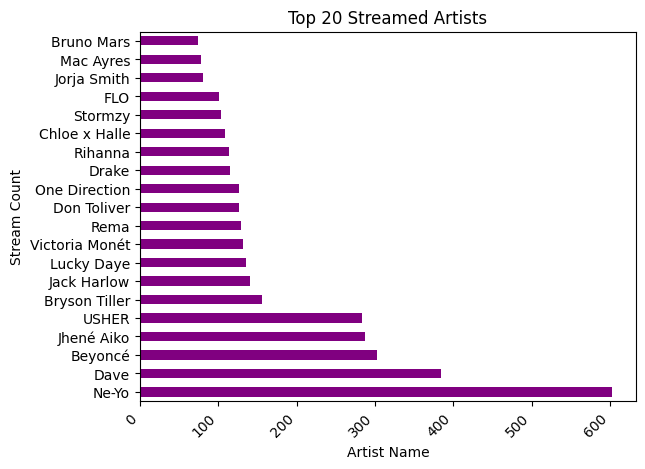

In [350]:
pd.value_counts(df["artistName"]).head(20).plot(kind="barh", color="purple")
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Streamed Artists")
plt.ylabel("Stream Count")
plt.xlabel("Artist Name")
figsize=(100,100)

Findings: Ne-Yo is the most listened to artist.

Recommendation: Spotify should auto-play this artist's songs once a playlist is finished or songs are not queued.

# Popular time of day to listen to music

In [351]:
pd.value_counts(df["time"])

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/1914797275.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["time"])


time
17:51    12
12:40    12
16:35    12
21:08    12
17:58    11
         ..
07:59     1
00:51     1
04:59     1
05:20     1
05:32     1
Name: count, Length: 1385, dtype: int64

## How many songs in each playlist?

In [352]:
#Import playlist data

playlist = pd.read_excel("/Users/juanitanelson-addy/OneDrive/VS CODE/CODING PROJECTS/datasets/playlistdata.xlsx")
playlist                         

,playlists,name,lastModifiedDate,items,track,trackName,artistName,albumName,trackUri,episode,audiobook,localTrack,addedDate,description,numberOfFollowers
0,NaN,to ji ji,2024-03-29,NaN,NaN,Hello,J. Cole,2014 Forest Hills Drive,spotify:track:7L3yLy4K5CI7AWK2DfAbTv,NaN,NaN,NaN,2024-03-29,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,Baby,Summer Walker,Last Day Of Summer,spotify:track:7aVKQJZwdqyEPkvKSyEuxj,NaN,NaN,NaN,2024-03-29,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,I Am,Jorja Smith,Black Panther The Album Music From And Inspire...,spotify:track:0DJBgBiYeSn6n1AXAkFVE8,NaN,NaN,NaN,2024-03-29,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Mad Over You,Runtown,Mad Over You,spotify:track:1jloWdvMh9nwHUu3mag8CL,NaN,NaN,NaN,2024-03-29,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,You (feat. Travis Scott),Don Toliver,Life of a DON,spotify:track:4qS2KPWvsQzLvRa9oCHw41,NaN,NaN,NaN,2024-03-29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,NaN,NaN,NaN,NaN,NaN,À la folie,Booba,Trône,spotify:track:2ENrPKCV8OyorEpDSsVpBh,NaN,NaN,NaN,2021-11-18,NaN,NaN
6173,NaN,NaN,NaN,NaN,NaN,Ça va aller,La Synesia,Conquête du trône,spotify:track:02PBAJJd2EPetkC3fbF3uv,NaN,NaN,NaN,2021-11-18,NaN,NaN
6174,NaN,NaN,NaN,NaN,NaN,École,Fally Ipupa,Control,spotify:track:7nWTlRtON9QfgovrWijUQf,NaN,NaN,NaN,2021-11-18,NaN,NaN
6175,NaN,NaN,NaN,NaN,NaN,“Caterpillars 1st” (INTRO),Ne-Yo,GOOD MAN,spotify:track:2Bw5wiShfFr7qXL3jHLkPm,NaN,NaN,NaN,2021-11-18,NaN,NaN


In [353]:
#Count values in each column
playlist.count()

playlists               0
name                   61
lastModifiedDate       61
items                   0
track                   0
trackName            6177
artistName           6177
albumName            6177
trackUri             6177
episode                 0
audiobook               0
localTrack              0
addedDate            6177
description            18
numberOfFollowers      61
dtype: int64

In [354]:
#Clean data

playlist = playlist.drop(["playlists", "items", "track", "trackUri", "episode", "localTrack", "description", "numberOfFollowers", "audiobook"], axis=1)
playlist.count()

name                  61
lastModifiedDate      61
trackName           6177
artistName          6177
albumName           6177
addedDate           6177
dtype: int64

In [355]:
for col in playlist.columns:
    print(col)

name
lastModifiedDate
trackName
artistName
albumName
addedDate


In [356]:
#New DF print
playlist

,name,lastModifiedDate,trackName,artistName,albumName,addedDate
0,to ji ji,2024-03-29,Hello,J. Cole,2014 Forest Hills Drive,2024-03-29
1,NaN,NaN,Baby,Summer Walker,Last Day Of Summer,2024-03-29
2,NaN,NaN,I Am,Jorja Smith,Black Panther The Album Music From And Inspire...,2024-03-29
3,NaN,NaN,Mad Over You,Runtown,Mad Over You,2024-03-29
4,NaN,NaN,You (feat. Travis Scott),Don Toliver,Life of a DON,2024-03-29
...,...,...,...,...,...,...
6172,NaN,NaN,À la folie,Booba,Trône,2021-11-18
6173,NaN,NaN,Ça va aller,La Synesia,Conquête du trône,2021-11-18
6174,NaN,NaN,École,Fally Ipupa,Control,2021-11-18
6175,NaN,NaN,“Caterpillars 1st” (INTRO),Ne-Yo,GOOD MAN,2021-11-18


In [357]:
#Filling in NaN with playlists names until next one shows up
playlist["name"] = playlist.name.replace(r"^\s*$", np.nan, regex=True).ffill()
playlist["name"]

0        to ji ji
1        to ji ji
2        to ji ji
3        to ji ji
4        to ji ji
          ...    
6172    All songs
6173    All songs
6174    All songs
6175    All songs
6176    All songs
Name: name, Length: 6177, dtype: object

In [358]:
playlist

,name,lastModifiedDate,trackName,artistName,albumName,addedDate
0,to ji ji,2024-03-29,Hello,J. Cole,2014 Forest Hills Drive,2024-03-29
1,to ji ji,NaN,Baby,Summer Walker,Last Day Of Summer,2024-03-29
2,to ji ji,NaN,I Am,Jorja Smith,Black Panther The Album Music From And Inspire...,2024-03-29
3,to ji ji,NaN,Mad Over You,Runtown,Mad Over You,2024-03-29
4,to ji ji,NaN,You (feat. Travis Scott),Don Toliver,Life of a DON,2024-03-29
...,...,...,...,...,...,...
6172,All songs,NaN,À la folie,Booba,Trône,2021-11-18
6173,All songs,NaN,Ça va aller,La Synesia,Conquête du trône,2021-11-18
6174,All songs,NaN,École,Fally Ipupa,Control,2021-11-18
6175,All songs,NaN,“Caterpillars 1st” (INTRO),Ne-Yo,GOOD MAN,2021-11-18


In [359]:
#List of playlists
playlist["name"].unique()

array(['to ji ji', 'combination', 'rnb belters',
       'My 2023 Playlist in a Bottle', 'you', 'are we in the 70s?',
       'chill study', 'en boucle', 'classic study', 'mac inspired',
       'bryson inspired', 'ig story songs', 'in the gym',
       'get those gains', 'the don', 'rema we wanna partyyy', 'big mike',
       'jhené', 'pj', 'billie eyelash', 'have some juice', 'mac ayres',
       'it’s your lucky daye', 'lil bit of neyo n usher',
       'barbz stand tf up!', 'harlow therapy', 'santan archives',
       'mr masego', 'frenchie', 'chill uk rap favs', 'afrobeats',
       'bashment/dancehall', 'cure your blues', 'rhythm and blues',
       'neo-soul', 'rock undertones', 'juanita señorita',
       'she’s feeling house', 'pass me a mf shot', 'laid back vol. I',
       'T21 part 1', 'you need this', 'a fine selection',
       'i feel like silk', 'dopamine n serotonin', "im my mother's child",
       'that new new', 'T21 main', 'rainy days', 'move your body',
       'regulars', 'laid

In [360]:
#Number of unique playlists
playlist["name"].nunique()

61

In [361]:
#No. of songs in each playlist
pd.value_counts(playlist["name"])

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/991501811.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(playlist["name"])


name
All songs                        2003
rhythm and blues                  366
regulars                          269
teenage fever                     227
reminiscing those club nights     204
                                 ... 
bryson inspired                     9
mac inspired                        9
My 2023 Playlist in a Bottle        9
that new new                        8
are we in the 70s?                  7
Name: count, Length: 61, dtype: int64

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_70951/3305276098.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(playlist["name"]).plot(kind="bar", color="purple", fontsize=7)


Text(0.5, 0, 'Playlist Name')

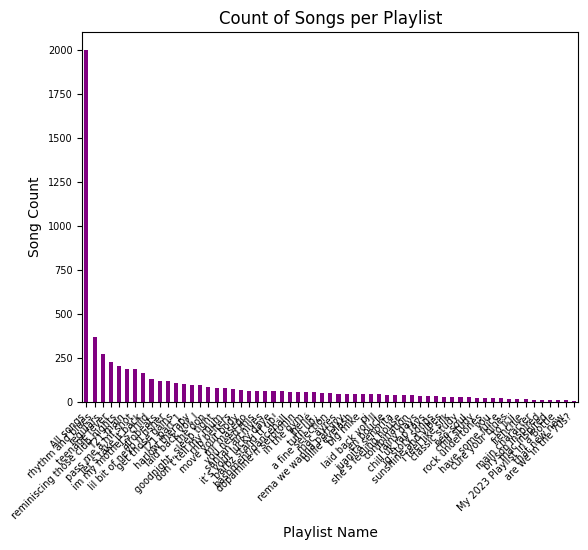

In [362]:
#Bar chart
pd.value_counts(playlist["name"]).plot(kind="bar", color="purple", fontsize=7)
figsize=(100,100)
plt.xticks(rotation=45, ha="right")
plt.title("Count of Songs per Playlist")
plt.ylabel("Song Count")
plt.xlabel("Playlist Name")